In [1]:
from google.colab import files
uploaded=files.upload()

Saving Employee.csv to Employee.csv


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline


In [3]:
df= pd.read_csv("Employee.csv")
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


In [4]:
print(df.dtypes)

Education                    object
JoiningYear                   int64
City                         object
PaymentTier                   int64
Age                           int64
Gender                       object
EverBenched                  object
ExperienceInCurrentDomain     int64
LeaveOrNot                    int64
dtype: object


**Columns:**

Education: The educational qualifications of employees, including degree, institution, and field of study.

Joining Year: The year each employee joined the company, indicating their length of service.

City: The location or city where each employee is based or works.

Payment Tier: Categorization of employees into different salary tiers.

Age: The age of each employee, providing demographic insights.

Gender: Gender identity of employees, promoting diversity analysis.

Ever Benched: Indicates if an employee has ever been temporarily without assigned work.

Experience in Current Domain: The number of years of experience employees have in their current field.

Leave or Not: a target column

In [5]:
df.describe()

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot
count,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000
mean,2015.062970,2.698259,29.393295,2.905652,0.343864
std,1.863377,0.561435,4.826087,1.558240,0.475047
min,2012.000000,1.000000,22.000000,0.000000,0.000000
25%,2013.000000,3.000000,26.000000,2.000000,0.000000
50%,2015.000000,3.000000,28.000000,3.000000,0.000000
75%,2017.000000,3.000000,32.000000,4.000000,1.000000
max,2018.000000,3.000000,41.000000,7.000000,1.000000


In [6]:
df.isnull()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
4648,False,False,False,False,False,False,False,False,False
4649,False,False,False,False,False,False,False,False,False
4650,False,False,False,False,False,False,False,False,False
4651,False,False,False,False,False,False,False,False,False


What is the distribution of educational qualifications among employees?

In [7]:

education_qualification= df["Education"].value_counts()
print(education_qualification)

Bachelors    3601
Masters       873
PHD           179
Name: Education, dtype: int64


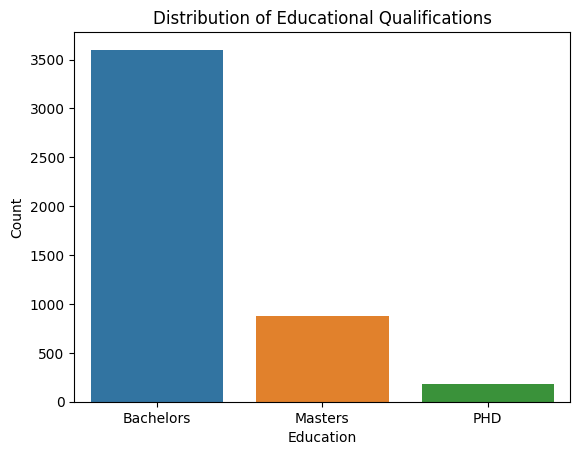

In [8]:


sns.barplot(x=education_qualification.index, y=education_qualification.values)

plt.title("Distribution of Educational Qualifications")
plt.xlabel("Education")
plt.ylabel("Count");

How does the length of service (Joining Year) vary across different cities?


In [9]:
cty_join=df[['JoiningYear', 'City']]
results=cty_join.groupby(['JoiningYear','City']).mean().reset_index()
print(results)

    JoiningYear       City
0          2012  Bangalore
1          2012  New Delhi
2          2012       Pune
3          2013  Bangalore
4          2013  New Delhi
5          2013       Pune
6          2014  Bangalore
7          2014  New Delhi
8          2014       Pune
9          2015  Bangalore
10         2015  New Delhi
11         2015       Pune
12         2016  Bangalore
13         2016  New Delhi
14         2016       Pune
15         2017  Bangalore
16         2017  New Delhi
17         2017       Pune
18         2018  Bangalore
19         2018  New Delhi
20         2018       Pune


In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


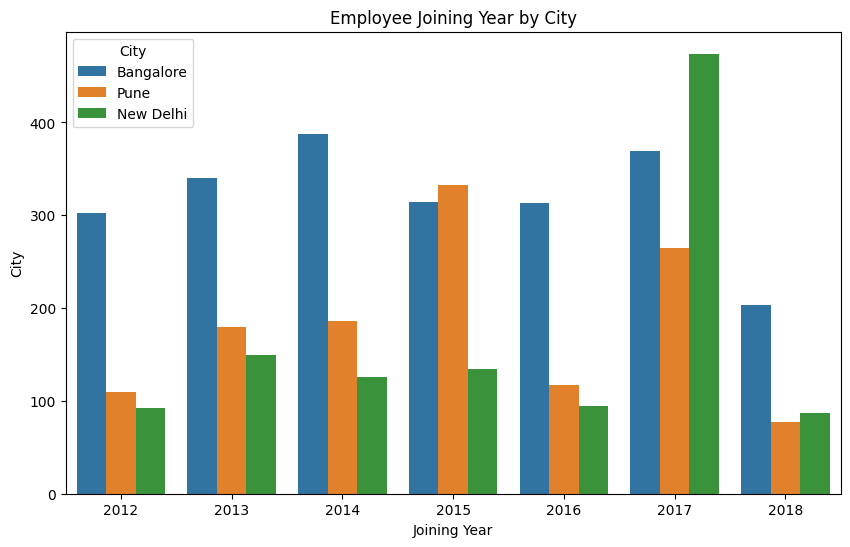

In [11]:
cty_join=df[['JoiningYear', 'City']]
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
sns.countplot(x='JoiningYear', hue='City', data=cty_join)
plt.xlabel('Joining Year')
plt.ylabel('City')
plt.title('Employee Joining Year by City')
plt.show()

**Is there a correlation between Payment Tier and Experience in Current Domain?**

In [12]:
from scipy import stats
pearson_coef,p_value=stats.pearsonr(df['PaymentTier'],df['ExperienceInCurrentDomain'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)


The Pearson Correlation Coefficient is 0.01831432138722388  with a P-value of P = 0.21164967310771038


**This shows that there is no linear correlation between both variables and there is no evidence that the correlation is significant based on  the P-value**

**What is the gender distribution within the workforce?**

In [13]:
gender_dist=df['Gender'].value_counts()
print(gender_dist)

Male      2778
Female    1875
Name: Gender, dtype: int64


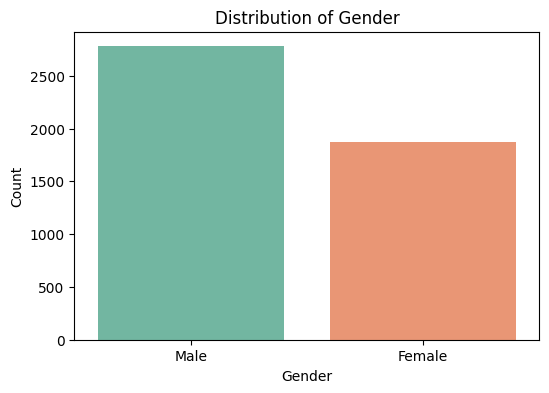

In [14]:
gender_dist=df['Gender'].value_counts()
plt.figure(figsize=(6, 4))  # Adjust the figure size if needed
sns.barplot(x=gender_dist.index, y=gender_dist.values, palette='Set2')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Distribution of Gender')
plt.show()